拟合并解释线性模型

检验模型假设

模型选择

回归分析时统计学的核心，通指那些用一个或多个预测变量（也称自变量或解释变量）来预测响应变量（也称因变量、校标变量或结果变量）的方法。

分析可以用来挑选与响应变量相关的解释变量，可以描述两者的关系，也可以生成一个等式，通过解释变量来预测响应变量。

# 8.1 回归的多面性

![回归分析的各种变体.jpg](./image/回归分析的各种变体.jpg)
重点是最小二乘回归法，包括简单线性回归、多线性回归和多元线性回归。

## 8.1.1 最小二乘回归法（OLS）的适用情境

## 8.1.2 基础回顾

# 8.2 最小二乘回归法

为了能够恰当地解释OLS模型的系数，数据必须满足以下统计假设。

    正态性
    独立性
    线性
    同方差性

## 8.2.1 用lm()拟合回归模型

在R中，拟合线性模型最基本的函数就是lm()，格式为：

    myfit <- lm(formula, data)
        formula指要拟合的模型形式，
        data是一个数据框，包含了用于拟合模型的数据。

![R表达式中常用的符号.jpg](./image/R表达式中常用的符号.jpg)

![对你和线性模型非常有用的其他函数.jpg](./image/对你和线性模型非常有用的其他函数.jpg)

简单线性回归：当回归模型包含一个因变量和一个自变量时。

多项式回归：当只有一个预测变量，同时包含变量的幂（比如 ，X、X2、X3）

多元线性回归

## 8.2.2 简单线性回归

In [2]:
# 简单线性回归
fit <- lm(weight ~ height, data=women)  #数据集women提供了15个年龄在30~39岁间女性的身高和体重信息
summary(fit)  #展示拟合模型的详细结果
#得到预测等式：weight= -87.5 + 3.45*Height

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [3]:
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

In [4]:
fitted(fit)  #列出拟合模型的预测值

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

1        2        3        4        5        6        7        8 
112.5833 116.0333 119.4833 122.9333 126.3833 129.8333 133.2833 136.7333 
       9       10       11       12       13       14       15 
140.1833 143.6333 147.0833 150.5333 153.9833 157.4333 160.8833

In [5]:
residuals(fit)  #列出拟合模型的残差值

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

1           2           3           4           5           6 
 2.41666667  0.96666667  0.51666667  0.06666667 -0.38333333 -0.83333333 
          7           8           9          10          11          12 
-1.28333333 -1.73333333 -1.18333333 -1.63333333 -1.08333333 -0.53333333 
         13          14          15 
 0.01666667  1.56666667  3.11666667

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

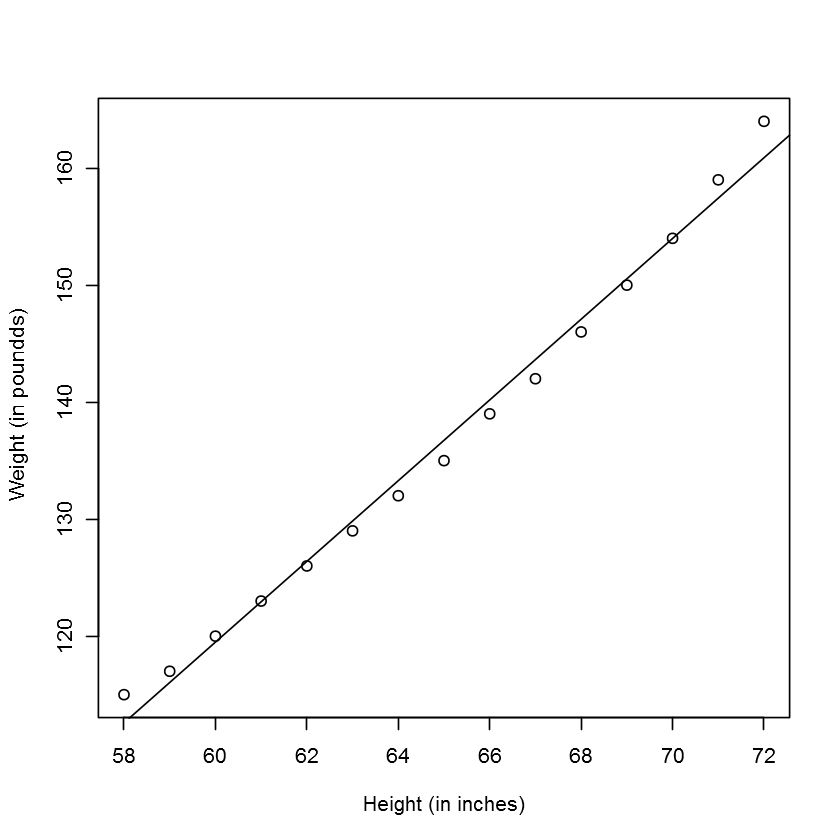

In [6]:
plot(women$height,women$weight,
    xlab="Height (in inches)",
    ylab="Weight (in poundds)")  #生成评价拟合模型的诊断图
abline(fit)  #

![线性模型与非线性模型.jpg](./image/线性模型与非线性模型.jpg)
一般来说，n次多项式生成一个n–1个弯曲的曲线。拟合三次多项式，可用：

    fit3 <- lm(weight ~ height + I(height^2) +I(height^3), data=women)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother.args" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""spread" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother.args" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""spread" is not a graphical par

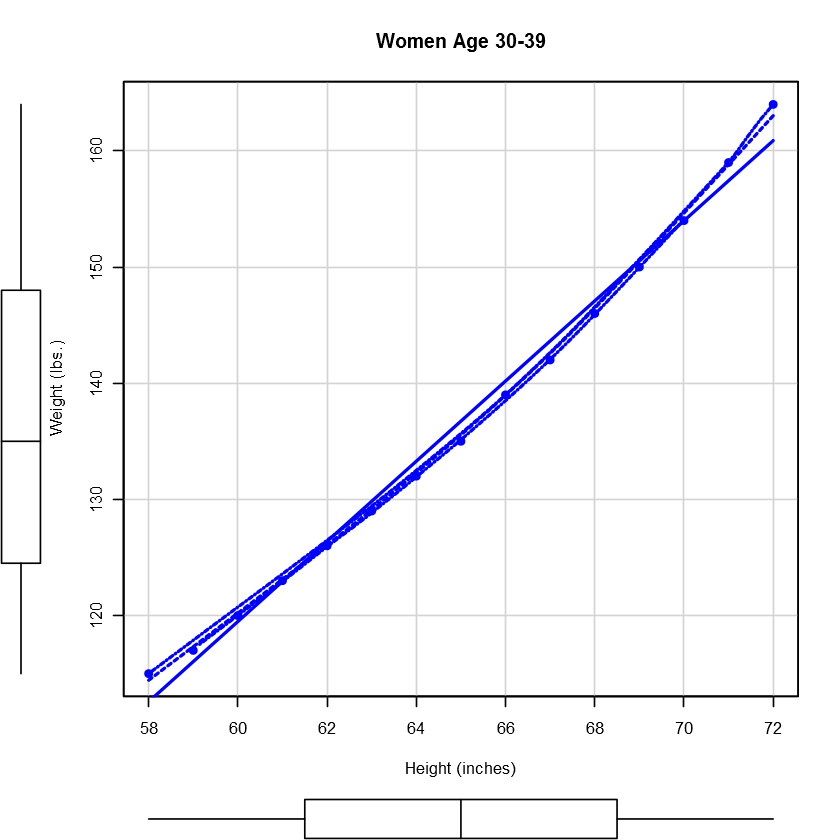

In [7]:
#car包中的scatterplot()函数可以很容易、方便地绘制二元关系图
#install.packages("car")
library(car)
scatterplot(weight ~ height, data=women,
           spread=FALSE, #删除了残差正负均方根在平滑曲线上的展开和非对称信息
           smoother.args=list(lty=2),  #设置loess拟合曲线为虚线
           pch=19, #设置点为实心圆（默认为空心圆）
           main="Women Age 30-39",
           xlab="Height (inches)",
           ylab="Weight (lbs.)")

## 8.2.4 多元线性回归

多项式回归可以算是多元线性回归的特例：二次回归有两个预测变量（X和X2），三次回归有三个预测变量（X、X2和X3）。

以基础包中的state.x77数据集为例，我们想探究一个州的犯罪率和其他因素的关系，包括人口、文盲率、平均收入和结霜天数（温度在冰点以下的平均天数）。

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,Murder,Population,Illiteracy,Income,Frost
Murder,1.0000000,0.3436428,0.7029752,-0.2300776,-0.5388834
Population,0.3436428,1.0000000,0.1076224,0.2082276,-0.3321525
Illiteracy,0.7029752,0.1076224,1.0000000,-0.4370752,-0.6719470
Income,-0.2300776,0.2082276,-0.4370752,1.0000000,0.2262822
Frost,-0.5388834,-0.3321525,-0.6719470,0.2262822,1.0000000


Warning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother.args" is not a graphical parameter"Warning message in title(...):
""spread" is not a graphical parameter"Warning message in title(...):
""smoother.args" is not a graphical parameter"Warning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother.args" is not a graphical parameter"Warning message in title(...):
""spread" is not a graphical parameter"Warning message in title(...):
""smoother.args" is not a graphical parameter"Warning message in axis(side = side, at = at, 

""smoother.args" is not a graphical parameter"Warning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother.args" is not a graphical parameter"Warning message in title(...):
""spread" is not a graphical parameter"Warning message in title(...):
""smoother.args" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""spread" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother.args" is not a graphical parameter"Warning message in plot.window(...):
""spread" is not a graphical parameter"Warning message in plot.window(...):
""smoother.args" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""spread" is not a graphical parameter"Warning messa

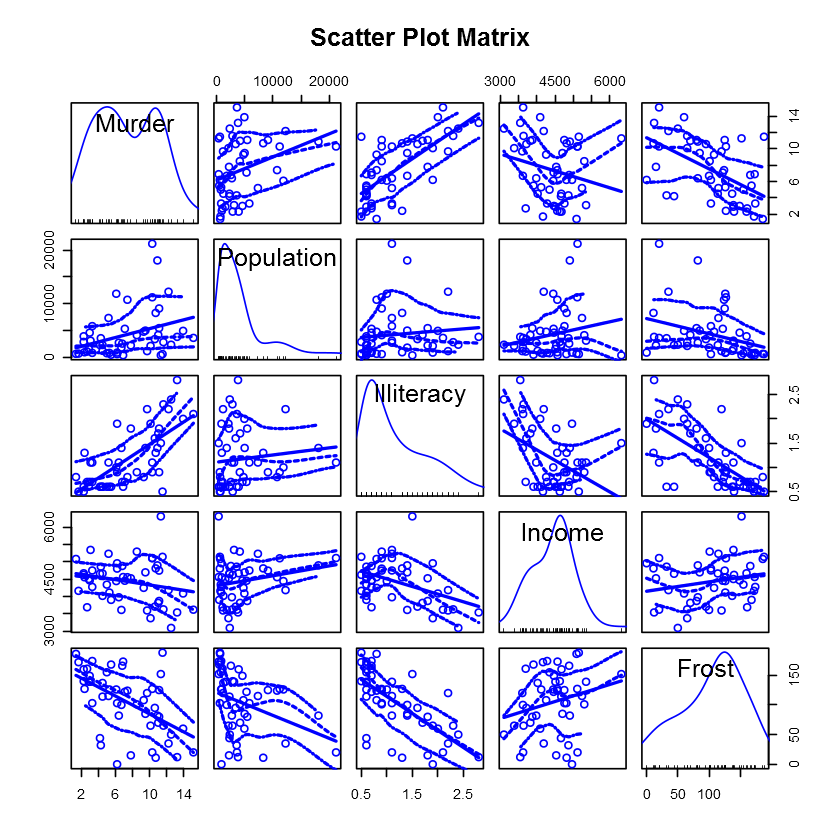

In [8]:
#多元回归分析中，第一步最好检查一下变量间的相关性。cor()函数提供了二变量之间的相关系数，car包中scatterplotMatrix()函数则会生成散点图矩阵

#检测二变量关系
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                     "Illiteracy", "Income", "Frost")]) #创建一个名为states的数据框
cor(states)
library(car)
scatterplotMatrix(states, spread=FALSE, smoother.args=list(lty=2),
                  main="Scatter Plot Matrix")
#scatterplotMatrix()函数默认在非对角线区域绘制变量间的散点图，并添加平滑和线性拟合曲线。对角线区域绘制每个变量的密度图和轴须图。

In [9]:
#多元线性回归
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                     "Illiteracy", "Income", "Frost")]) #创建一个名为states的数据框
fit <- lm(Murder ~ Population + Illiteracy +Income + Frost,
         data=states)

summary(fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


## 8.2.5 有交互项的多元线性回归

In [10]:
#有显著交互项的多元线性回归
#mtcars数据框中的汽车数据为例，把汽车重量和马力作为预测变量，并包含交互项来你和回归模型。
fit <- lm(mpg ~ hp +wt +hp:wt, data=mtcars)
summary(fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
lm(formula = mpg ~ hp + wt + hp:wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


通过effects包中effext()函数，可以用图形展示交互项的结果。格式为：

    plot(effect(term,mod,xlevels),multiline=TRUE)
        term即模型要画的项，
        mod为通过lm()拟合的模型，
        xlevels是一个列表，指定变量要设定的常量值，
        multiline=TRUE选项表示添加相应直线。

Installing package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'effects' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpOSWEus\downloaded_packages


Warning message:
"package 'effects' was built under R version 3.5.3"lattice theme set by effectsTheme()
See ?effectsTheme for details.


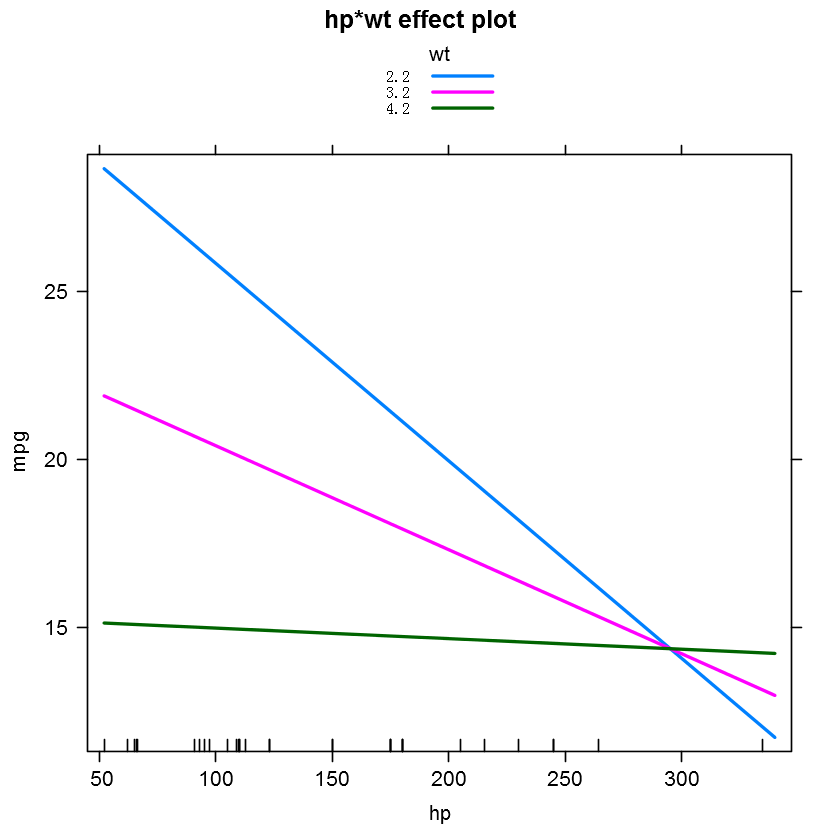

In [11]:
install.packages("effects")
library(effects)
plot(effect("hp:wt", fit,, list(wt=c(2.2,3.2,4.2))), multiline=TRUE)

# 8.3 回归诊断

In [12]:
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                     "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
confint(fit)
#回归诊断技术向你提供了评价回归模型适用性的必要工具，它能帮助发现并纠正问题

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,2.5 %,97.5 %
(Intercept),-6.552191e+00,9.0213182149
Population,4.136397e-05,0.0004059867
Illiteracy,2.381799e+00,5.9038743192
Income,-1.312611e-03,0.0014414600
Frost,-1.966781e-02,0.0208304170


## 8.3.1 标准方法

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

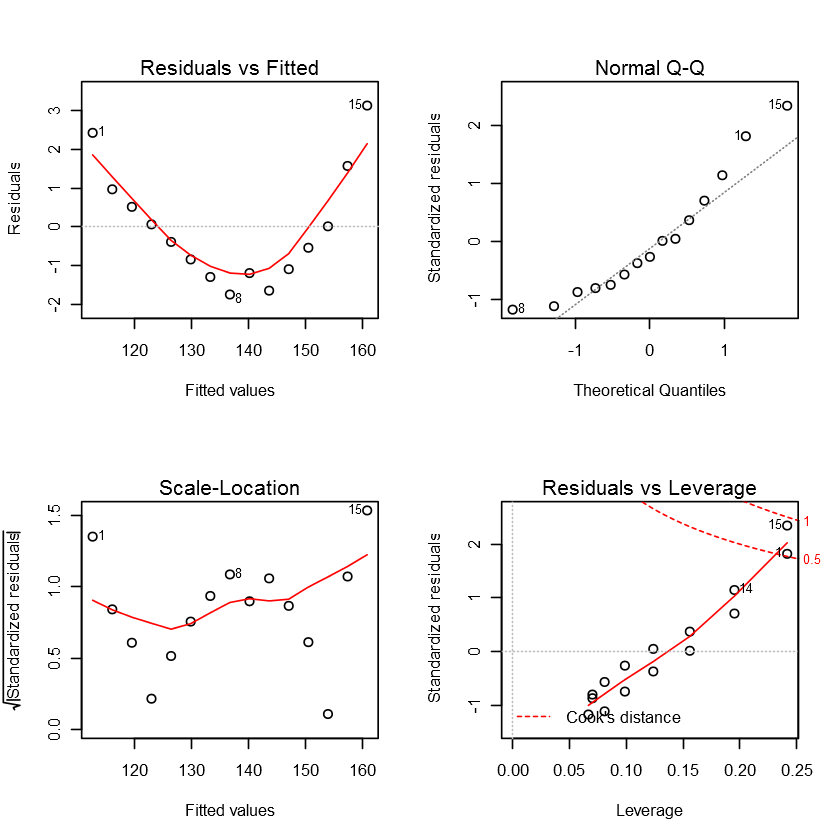

In [13]:
#最常用的方法就是对lm()函数返回的对象使用plot()函数，可以生成评价模型你和情况的四幅图形。

fit <- lm(weight ~ height, data=women)
par(mfrow=c(2,2))
plot(fit) #体重对身高回归的诊断图

#Normal Q-Q图  是在正态分布对应的值下，标准化残差的概率图。
        
        若满足正态假设，那么图上的点应该落在呈45度角的直线上；
        若不是如此，那么就违反了正态性的假设。

#线性 若因变量与自变量线性相关，那么残差值与预测（拟合）值就没有任何系统关联。

        换句话说，除了白噪声，模型应该包含数据中所有的系统方差。
        在“残差图与拟合图”（Residuals vs Fitted，左上）中可以清楚地看到一个曲线关系，
        这暗示着你可能需要对回归模型加上一个二次项。

#同方差性  若满足不变方差假设，那么在“位置尺度图”（Scale-Location Graph，左下）中，水平线周围的点应该随机分布。该图似乎满足此假设。

#一个观测点是离群点   表明拟合回归模型对其预测效果不佳（产生了巨大的或正或负的残差）。

#一个观测点有很高的杠杆值    表明它是一个异常的预测变量值的组合。

    在预测变量空间中，它是一个离群点。
    因变量值不参与计算一个观测点的杠杆值。

#一个观测点是强影响点（influential observation）   表明它对模型参数的估计产生的影响过大，非常不成比例。

    强影响点可以通过Cook距离即Cook’s D统计量来鉴别。
    

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

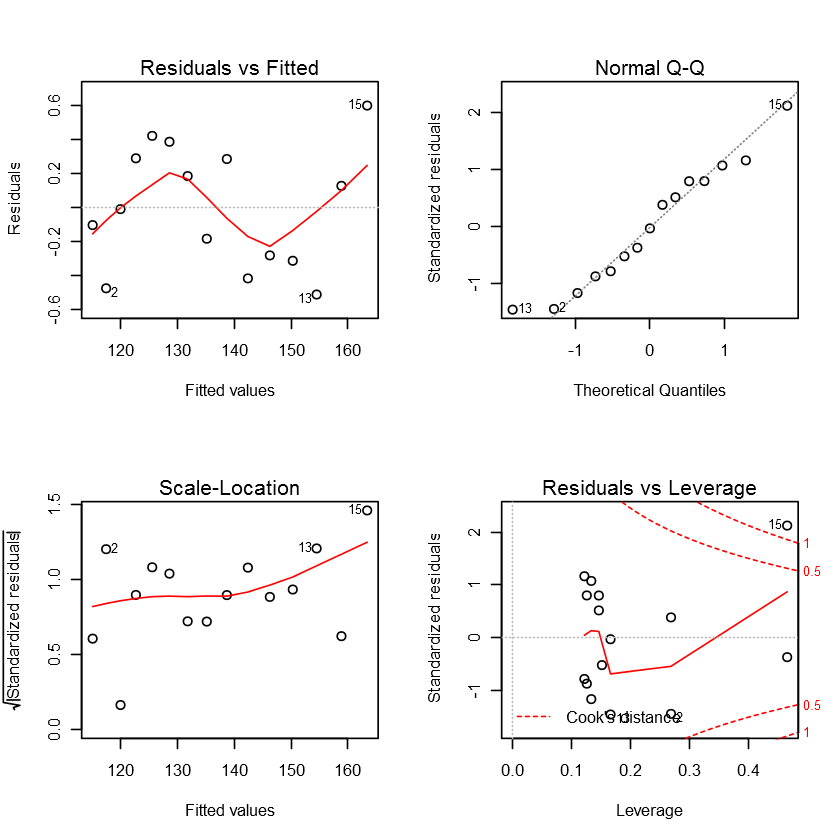

In [14]:
fit2 <- lm(weight ~ height + I(height^2), data=women)
par(mfrow=c(2,2))
plot(fit2)

#这第二组图表明多项式回归拟合效果比较理想，基本符合了线性假设、残差正态性（除了观测点13）和同方差性（残差方差不变）。观测点15看起来像是强影响点（根据是它有较大的Cook距离值），删除它将会影响参数的估计。

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

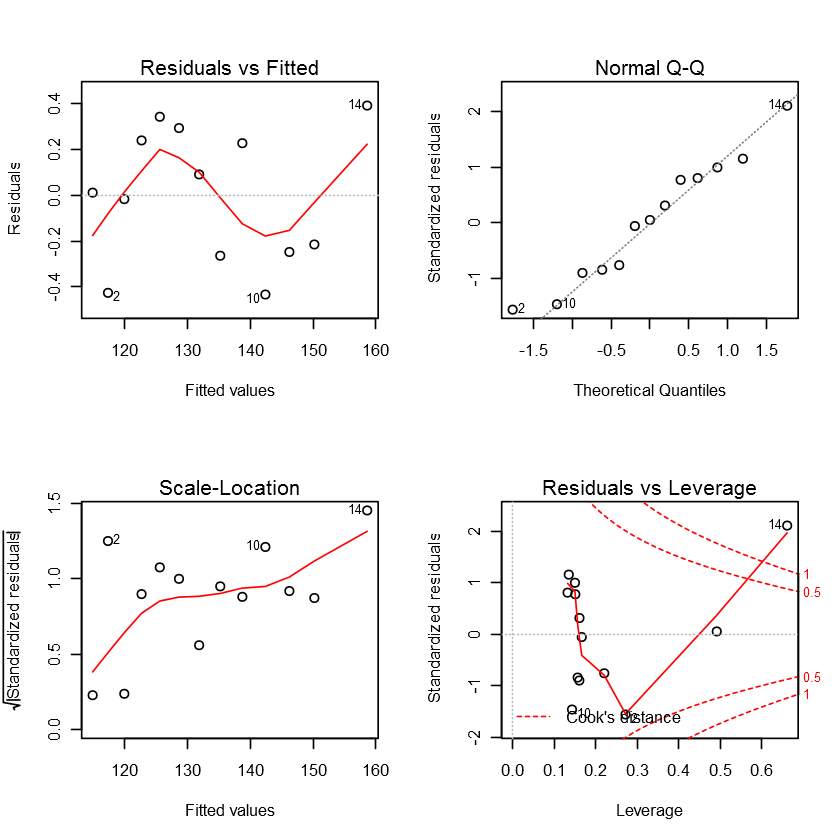

In [15]:
#删除观测点13和15，模型会拟合得会更好
newfit <- lm(weight~ height + I(height^2), data=women[-c(13,15),])
par(mfrow=c(2,2))
plot(newfit)

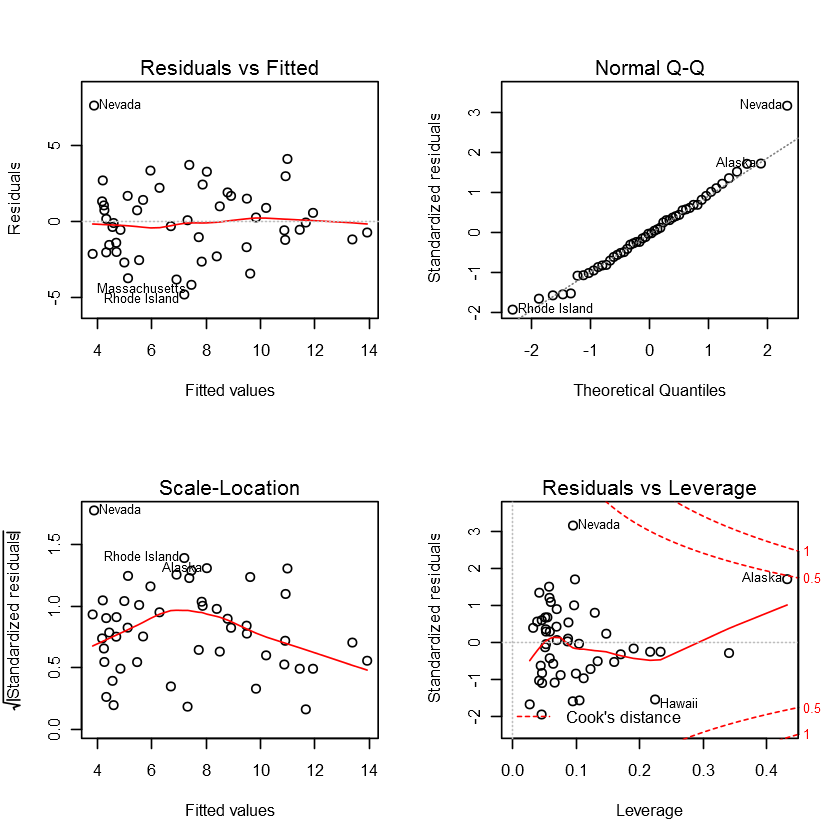

In [16]:
states <- as.data.frame(state.x77[,c("Murder", "Population",
"Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
par(mfrow=c(2,2))
plot(fit)

## 8.3.2  改进的方法


![回归诊断实用函数](./image/回归诊断实用函数.jpg)
![回归诊断实用函数2](./image/回归诊断实用函数2.jpg)

### 1 正态性

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Nevada Rhode Island 
          28           39

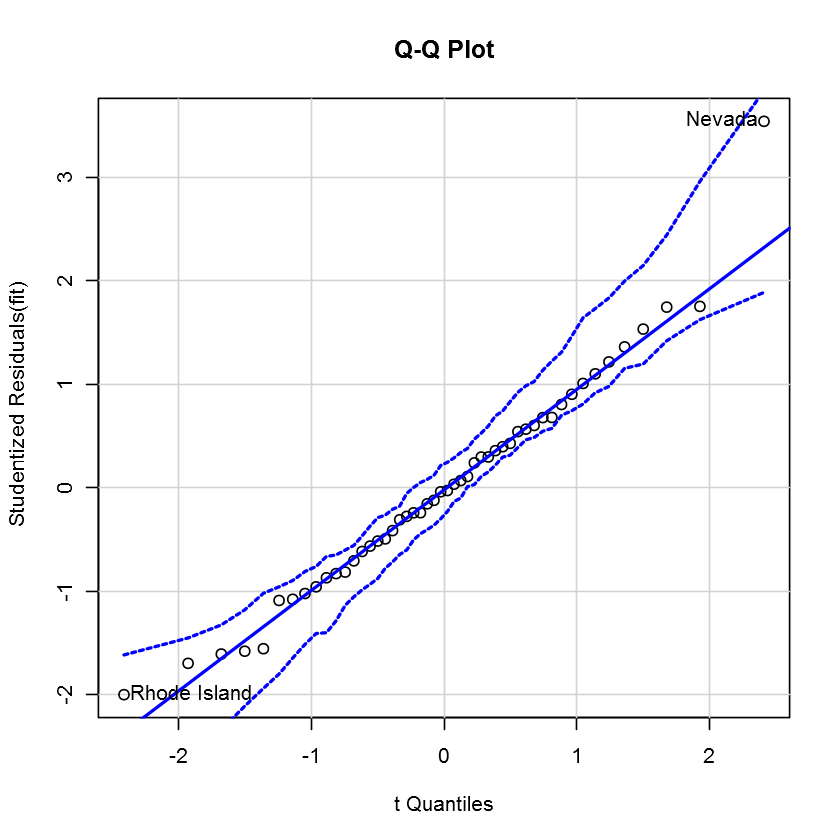

In [17]:
library(car)
states <- as.data.frame(state.x77[,c("Murder", "Population",
"Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
qqPlot(fit, labels=row.names(states), id.method="identify",
simulate=TRUE, main="Q-Q Plot")
#id.method = "identify"选项能够交互式绘图——待图形绘制后，用鼠标单击图形内的点，将会标注函数中labels选项的设定值。
#敲击Esc键，从图形下拉菜单中选择Stop，或者在图形上右击，都将关闭这种交互模式
#当simulate=TRUE时，95%的置信区间将会用参数自助法

In [18]:
states["Nevada",]
#Nevada的谋杀率是11.5%

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

,Murder,Population,Illiteracy,Income,Frost
Nevada,11.5,590,0.5,5149,188


In [19]:
fitted(fit)["Nevada"]
#模型预测的谋杀率为3.9%

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Nevada 
3.878958

In [20]:
residuals(fit)["Nevada"]

Nevada 
7.621042

In [21]:
rstudent(fit)["Nevada"]

Nevada 
3.542929

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

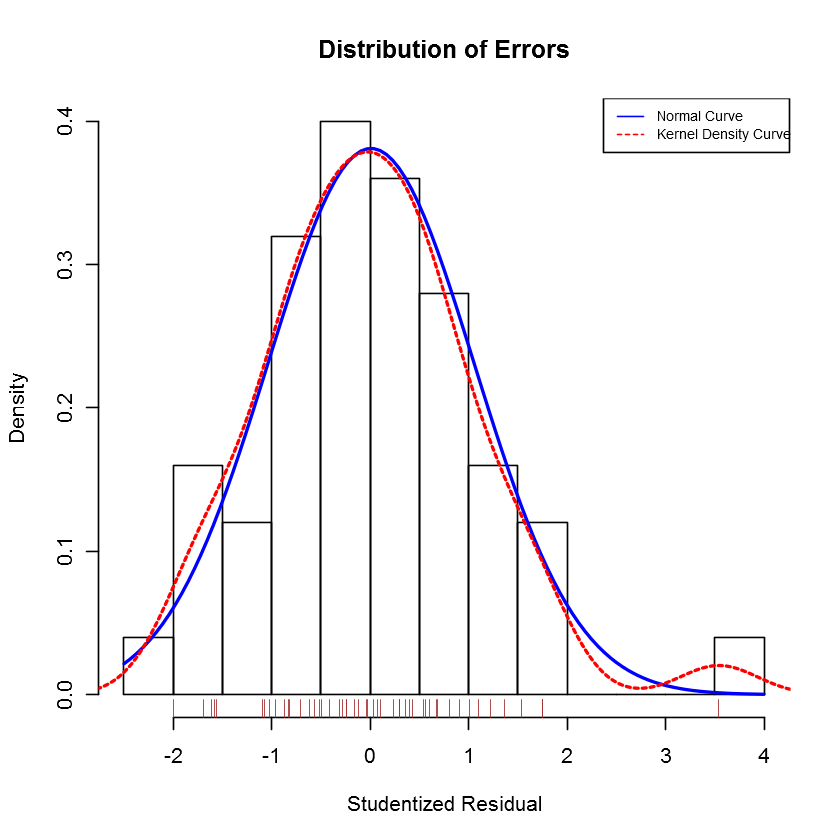

In [22]:
#绘制学生化残差图的函数
residplot  <- function(fit,nbreaks=10){
    z <- rstudent(fit)
    hist(z, breaks=nbreaks,freq=FALSE,
        xlab="Studentized Residual",
        main="Distribution of Errors")
    rug(jitter(z),col="brown")
    curve(dnorm(x,mean=mean(z),sd=sd(z)),
         add=TRUE, col="blue",lwd=2)
    lines(density(z)$x, density(z)$y,
         col="red",lwd=2,lty=2)
    legend("topright",
          legend = c( "Normal Curve", "Kernel Density Curve"),
          lty=1:2, col=c("blue", "red"), cex=.7)
}
residplot(fit)

### 2. 误差的独立性

In [23]:
#car包提供了一个可做Durbin-Watson检验的函数，能够检测误差的序列相关性。
durbinWatsonTest(fit)
#p值不显著（0.228）说明无自相关性。
#该检验使用于时间独立的数据，对于非聚集性的数据并不是用。
#durbinWatsonTest()函数使用自助法来导出p值。
#添加simulate=TRUE，则每次运行测试时获得的结果都将略有不同

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

 lag Autocorrelation D-W Statistic p-value
   1      -0.2006929      2.317691   0.254
 Alternative hypothesis: rho != 0

### 3 线性

通过成分残差图（偏残差图）来看因变量与自变量之间是否呈非线性关系，也可以看看是否有不同于已设定线性模型的系统偏差，图形可以用car包中的crPlots()函数绘制。

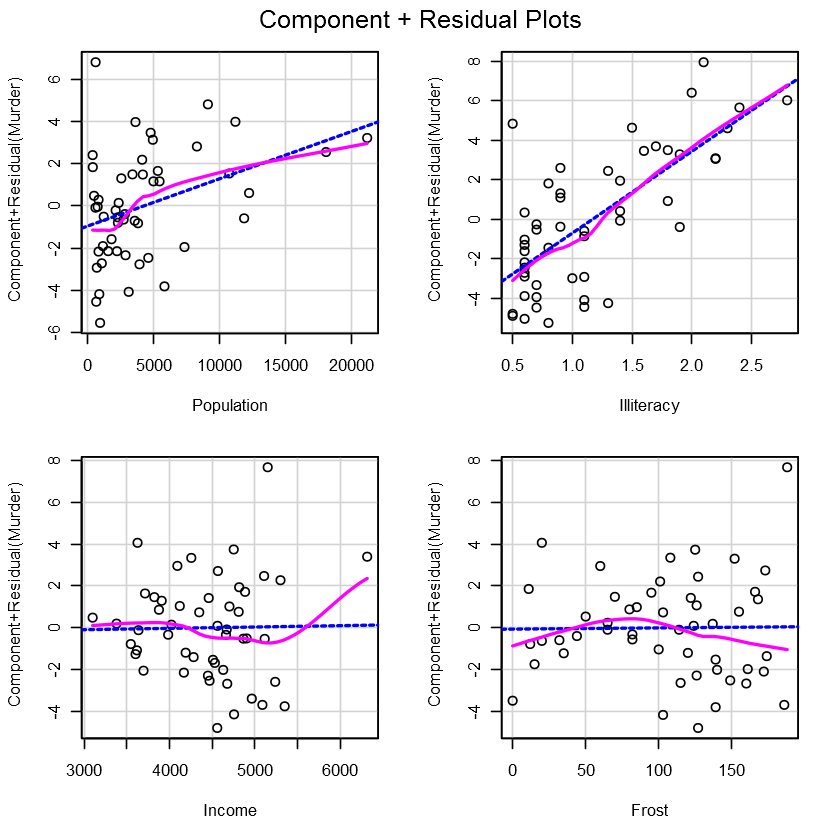

In [24]:
#谋杀绿对州各因素回归的成分残差图
library(car)
crPlots(fit)
#如果图形存在非线性，则说明你可能对预测变量的函数形式建模不够充分，需要添加一些曲线成分，比如多项式项，或对一个或多个变量进行变化，或用其他回归变体形式而不是线性回归。

### 4、同方差性

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.746514, Df = 1, p = 0.18632


Suggested power transformation:  1.209626 

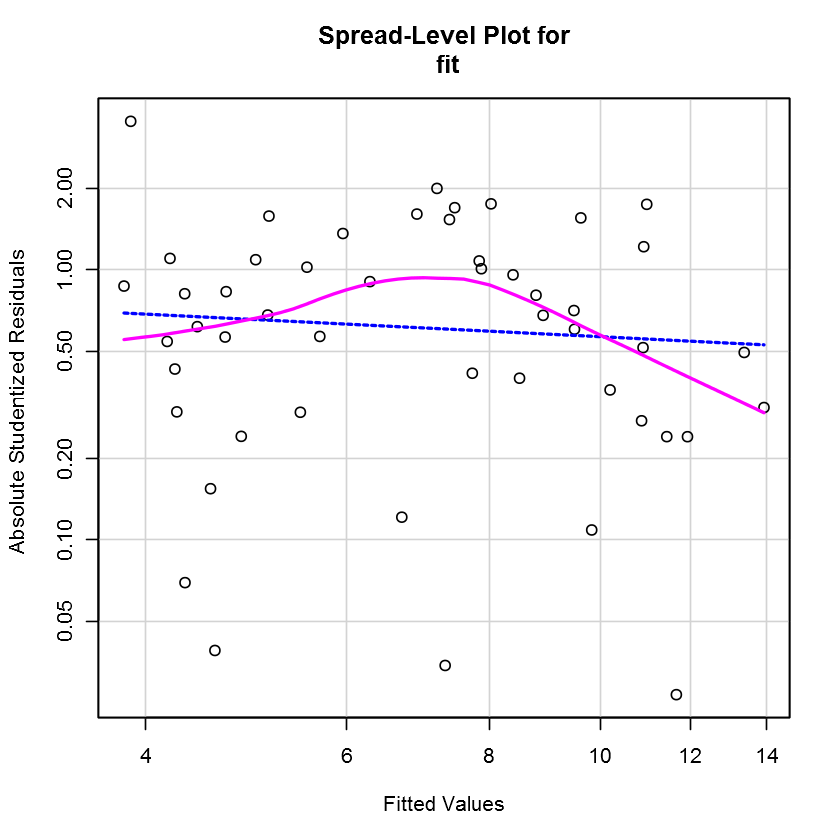

In [25]:
#检验同方差性
library(car)
ncvTest(fit)
spreadLevelPlot(fit)

### 8.3.3 线性模型假设的综合验证

gvlma包中的gvlma()函数。gvlma()函数能对线性模型假设进行综合验证，同时还能做偏斜度、峰度和异方差性的评价。

换句话说，它给模型假设提供了一个单独的综合检验。

In [28]:
#线性模型假设的综合检验
install.packages("gvlma")
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsInstalling package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpOSWEus\downloaded_packages


Warning message:
"package 'gvlma' was built under R version 3.5.2"


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                    Value p-value                Decision
Global Stat        2.7728  0.5965 

## 8.3.4  多重共线性

多重共线性可用统计量VIF（Variance Inflation Factor，方差膨胀因子）进行检测。VIF的平方根表示变量回归参数的置信区间能膨胀为与模型无关的预测变量的程度

car包中的vif()函数提供VIF值。一般原则下， vif的开根号 >2就表明存在多重共线性问题。

In [31]:
#检测多重共线性
library(car)
vif(fit)
sqrt（vif(fit)) > 2 #problem?

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Population Illiteracy     Income      Frost 
  1.245282   2.165848   1.345822   2.082547

Population Illiteracy     Income      Frost 
     FALSE      FALSE      FALSE      FALSE

# 8.4 异常观测值

一个全面的回归分析要覆盖对异常值的分析，包括离群点、高杠杠值点和强影像点。

这些数据点需要更深入的研究，因为他们在一定程度上与其他观测点不同，可能对结果产生较大的负面影响。

## 8.4.1 离群点

离群点是指那些模型预测效果不佳的观测点。它们通常有很大的、或正或负的残差。

正的残差说明模型低估了响应值，

负的残差则说明高估了响应值。

其中一种鉴别离群点的方法是：Q-Q图，落在置信区间大歪的点即可被认为是离群点。

另外一种粗糙的判断准则：标准化残差值大于2或者小于-2的点可能是离群点，需要特别关注。

car包提供一种离群点的统计检验方法。

outlierTest()函数可以求得最大标准化残差绝对值Bonferroni调整后的p值

In [32]:
library(car)
outlierTest(fit)
# Nevada被判定为离群点（p=0.048）
#该函数只是根据单个最大（或正或负）残差值的显著性来判断是否有离群点。
#若不显著，则说明数据集中没有离群点，
#若显著，则必须删除该离群点，然后再检验是否还有其他离群点存在。

       rstudent unadjusted p-value Bonferonni p
Nevada 3.542929         0.00095088     0.047544

## 8.4.2 高杠杆值点

即与其他预测变量有关的离群点。

换句话说，它们是有许多异常的预测变量值组合起来的，与响应变量值没有关系。

高杠杆值的观测点可通过帽子统计量（hat statistic）判断。

对于一个给定的数据集，帽子均值为p/n，其中p是模型估计的参数数目（包含截距项），n是样本量。

一般来说，若观测点的帽子值大于帽子均值的2或3倍，就可以认定为高杠杆值点。

integer(0)

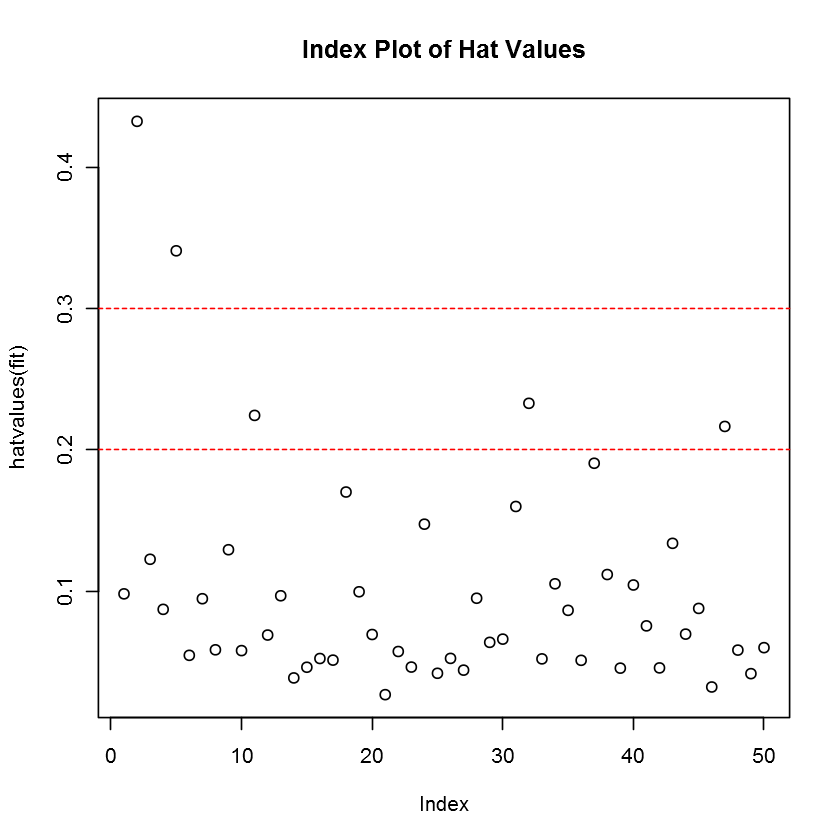

In [33]:
hat.plot <- function(fit){
    p <- length(coefficients(fit))
    n <- length(fitted(fit))
    plot(hatvalues(fit),main = "Index Plot of Hat Values")
    abline(h=c(2,3)*p/n, col="red",lty=2)
    identify(1:n, hatvalues(fit),names(hatvalues(fit)))
}

hat.plot(fit)

#水平线标注的即帽子均值2倍和3倍的位置。定位函数（locator function）能以交互模式绘图：单击感兴趣的点，然后进行标注，停止交互式，用户可按Esc键退出。或从图形下拉菜单中选择Stop，或直接右击图形。


## 8.4.3 强影响点

即对模型参数估计值影响有些比例失衡的点。

例如：若移除模型的一个观测点事模型会发生巨大的改变，那么你就需要检测一下数据中是否存在强影响点。

两种方法检测强影响点：

Cook距离，或称D统计量，以及变量添加图。

        一般来说，Cook's D值大于4/(n-k-1)，则表明他是强影像点，其中n为样本量大小，k是预测变量数目。

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

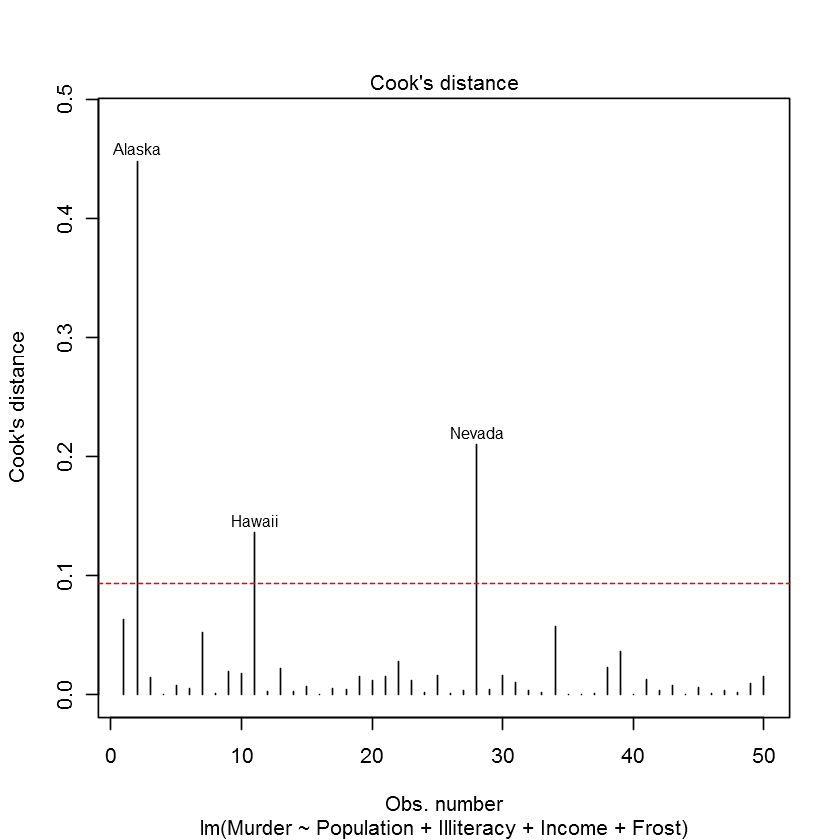

In [38]:
#鉴别强影像点的Cook's D图

cutoff <- 4/(nrow(states)-length(fit$coefficients)-2)
plot(fit, which=4, cook.levels=cutoff)
abline(h=cutoff, lty=2, col="red")

变量添加图，即对于每个预测变量Xk，绘制Xk在其他k–1个预测变量上回归的残差值相
对于响应变量在其他k–1个预测变量上回归的残差值的关系图。

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a

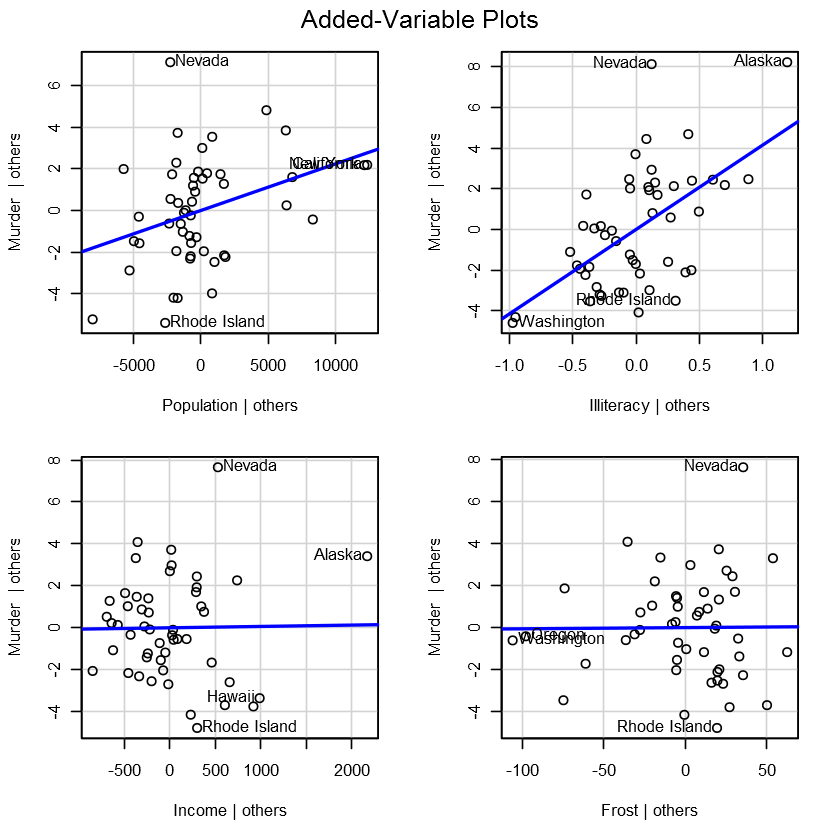

In [39]:
library(car)
avPlots(fit, ask=FALSE, id.method="identify")

利用car包中的influencePlot()函数，你还可以将离群点、杠杆值和强影响点的信息整合到一幅图形中：

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"

,StudRes,Hat,CookD
Alaska,1.7536917,0.43247319,0.448050997
California,-0.2761492,0.34087628,0.008052956
Nevada,3.5429286,0.09508977,0.209915743
Rhode Island,-2.0001631,0.04562377,0.035858963


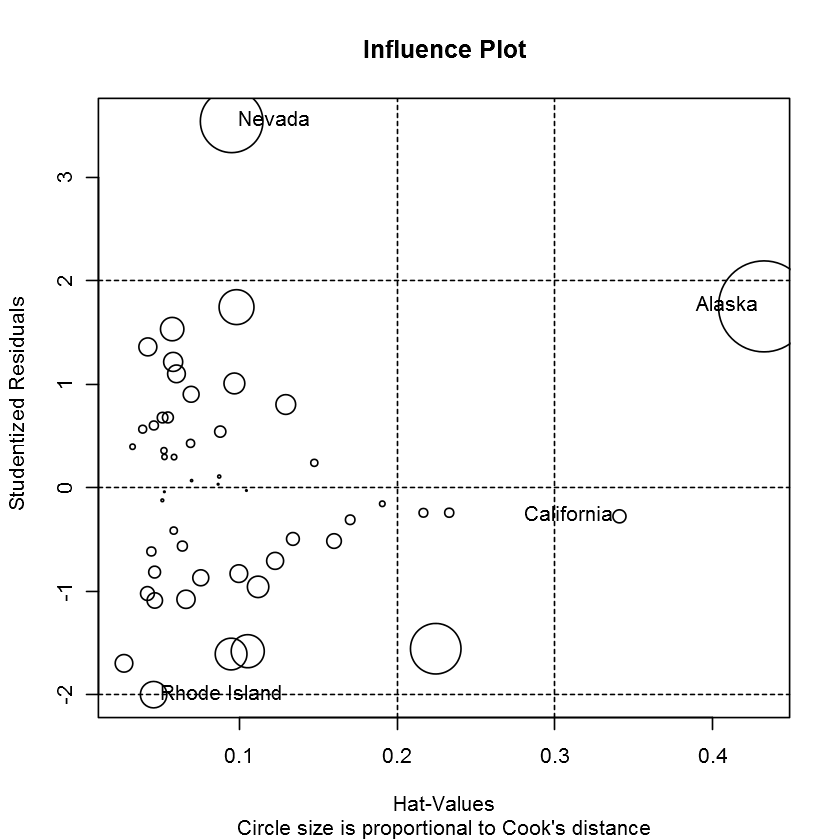

In [40]:
library(car)
influencePlot(fit,id.method="identify",main="Influence Plot",
             sub="Circle size is proportional to Cook's distance")

# 8.5 改进措施

有四种方法可以处理违背回归假设的问题：

    删除观测点
    变来给你变换
    添加或删除变量
    使用其他回归方法

## 8.5.1 删除观测点

删除离群点通常可以提高数据集对于正态假设的拟合度，而强影响点会干扰结果，通常也会被删除。

删除最大的离群点或者强影响点后，模型需要重新拟合。

若离群点或强影响点仍然存在，重复以上过程直至获得比较满意的拟合。

## 8.5.2 变量变换

当模型不符合正态性、线性或者同方差性假设时，一个或多个变量的变换通常可以改善或调整模型效果。

当模型违反正态假设时，通常可以对响应变量尝试某种变换。car包中的powerTransform()
函数通过λ的最大似然估计来正态化变量Xλ。

In [42]:
#Box-Cox正态变换
library(car)
summary(powerTransform(states$Murder))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

bcPower Transformation to Normality 
              Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
states$Murder    0.6055           1       0.0884       1.1227

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                           LRT df     pval
LR test, lambda = (0) 5.665991  1 0.017297

Likelihood ratio test that no transformation is needed
                           LRT df    pval
LR test, lambda = (1) 2.122763  1 0.14512

# 8.6 选择“最佳”的回归模型

## 8.6.1 模型比较

用基础安装中的anova()函数可以比较两个嵌套模型的拟合优度。

所谓嵌套模型，即它的一些项完全包含在另一个模型中。

在states的多元回归模型中，我们发现Income和Frost的回归系数不显著，此时你可以检验不含这两个变量的模型与包含这两项的模型预测效果是否一样好

In [43]:
#用anova()函数比较

states <- as.data.frame(state.x77[,c("Murder","Population",
                                    "Illiteracy","Income","Frost")])

fit1 <- lm(Murder ~ Population + Illiteracy + Income +Frost,
          data=states)
fit2 <- lm(Murder ~ Population + Illiteracy,data=states)
anova(fit2,fit1)

#模型1嵌套在模型2中。anova()函数同时还对是否应该添加Income和Frost到线性模型中进行了检验。由于检验不显著（p=0.994），我们可以得出结论：不需要将这两个变量添加到线性模型中，可以将它们从模型中删除。

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
47,289.2457,NA,NA,NA,NA
45,289.1672,2,0.07850518,0.006108462,0.993911


AIC（Akaike Information Criterion，赤池信息准则）也可以用来比较模型，它考虑了模型的统计拟合度以及用来拟合的参数数目。

AIC值较小的模型要优先选择，它说明模型用较少的参数获得了足够的拟合度.

In [44]:
fit1 <- lm(Murder ~ Population + Illiteracy + Income +Frost,
          data=states)
fit2 <- lm(Murder ~ Population + Illiteracy,data=states)
AIC(fit1,fit2)

,df,AIC
fit1,6,241.6429
fit2,4,237.6565


## 8.6.2 变量选择

### 1.逐步回归

逐步回归中，模型会一次添加或者删除一个变量，直到达到某个判停准则为止。

    向前逐步回归（forward stepwise regression）每次添加一个预测变量到模型中，直到添加变量不会使模型有所改进为止。
    向后逐步回归（backward stepwise regression）从模型包含所有预测变量开始，一次删除一个变量直到会降低模型质量为止。
    向前向后逐步回归（stepwise stepwise regression，通常称作逐步回归，以避免听起来太冗长），结合了向前逐步回归和向后逐步回归的方法，变量每次进入一个，但是每一步中，变量都会被重新评价，对模型没有贡献的变量将会被删除，预测变量可能会被添加、删除好几次，直到获得最优模型为止。
    
逐步回归法的实现依据增删变量的准则不同而不同。

MASS包中的stepAIC()函数可以实现逐步回归模型（向前、向后和向前向后），依据的是精确AIC准则。

In [48]:
#向后回归
library(MASS)
states <- as.data.frame(state.x77[,c("Murder","Population",
                                    "Illiteracy","Income","Frost")])

fit <- lm(Murder ~ Population + Illiteracy + Income + Frost,
          data=states)

stepAIC(fit,direction="backward")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Start:  AIC=97.75
Murder ~ Population + Illiteracy + Income + Frost

             Df Sum of Sq    RSS     AIC
- Frost       1     0.021 289.19  95.753
- Income      1     0.057 289.22  95.759
<none>                    289.17  97.749
- Population  1    39.238 328.41 102.111
- Illiteracy  1   144.264 433.43 115.986

Step:  AIC=95.75
Murder ~ Population + Illiteracy + Income

             Df Sum of Sq    RSS     AIC
- Income      1     0.057 289.25  93.763
<none>                    289.19  95.753
- Population  1    43.658 332.85 100.783
- Illiteracy  1   236.196 525.38 123.605

Step:  AIC=93.76
Murder ~ Population + Illiteracy

             Df Sum of Sq    RSS     AIC
<none>                    289.25  93.763
- Population  1    48.517 337.76  99.516
- Illiteracy  1   299.646 588.89 127.311



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Coefficients:
(Intercept)   Population   Illiteracy  
  1.6515497    0.0002242    4.0807366  


开始时模型包含4个（全部）预测变量，

然后每一步中，AIC列提供了删除一个行中变量后模型的AIC值，<none>中的AIC值表示没有变量被删除时模型的AIC。

第一步，Frost被删除，AIC从97.75降低到95.75；

第二步，Income被删除，AIC继续下降，成为93.76。

然后再删除变量将会增加AIC，因此终止选择过程。

### 2. 全子集回归

全子集回归是指所有可能的模型都会被检验。

全子集回归可用leaps包中的regsubsets()函数实现。

你能通过R平方、调整R平方或Mallows Cp统计量等准则来选择“最佳”模型。

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsInstalling package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpOSWEus\downloaded_packages


Warning message:
"package 'leaps' was built under R version 3.5.3"

ERROR: Error in legend(if (!is.na(charmatch(legend[1], "interactive"))) locator(1) else if (is.character(legend)) legend else if (is.numeric(legend) && : invalid coordinate lengths


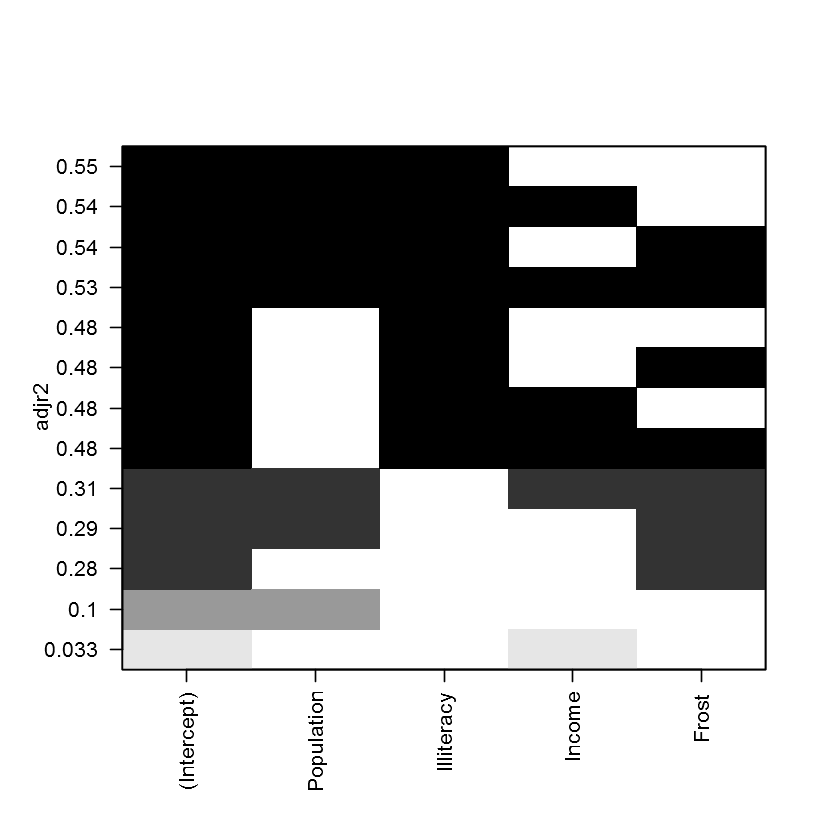

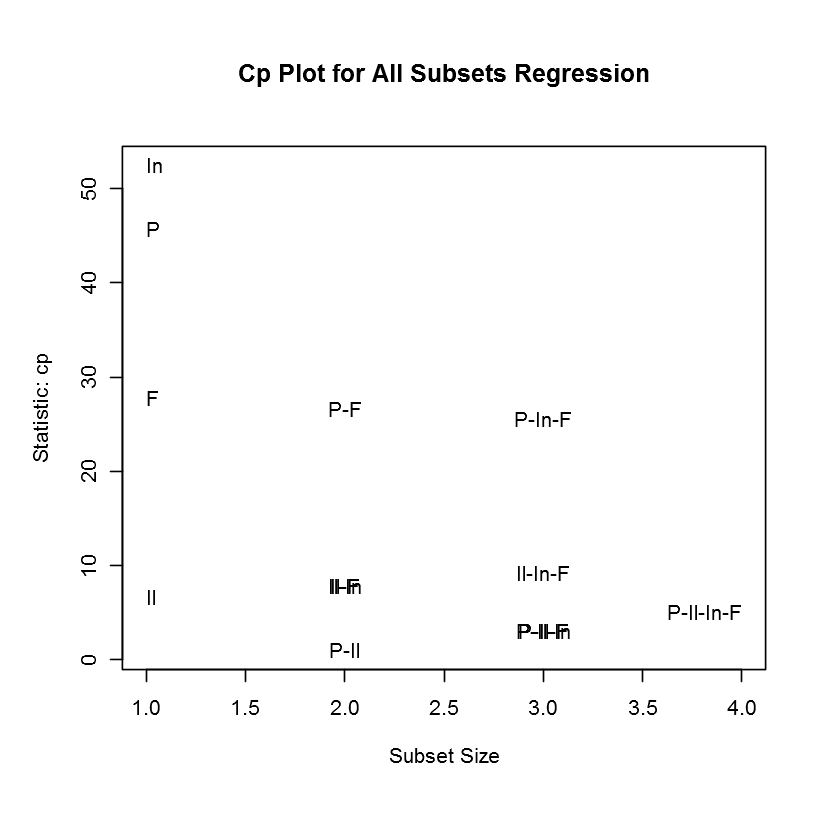

In [50]:
#全子集回归
install.packages("leaps")
library(leaps)
states <- as.data.frame(state.x77[,c("Murder","Population", "Illiteracy","Income","Frost")])

leaps <-regsubsets(Murder ~ Population + Illiteracy + Income +
                   Frost, data=states, nbest=4)
plot(leaps, scale="adjr2")

library(car)
subsets(leaps,statistic="cp",
       main="Cp Plot for All Subsets Regression")

abline(1,1,lty=2,col="red")

# 8.7 深层次分析

## 8.7.1 交叉验证

In [55]:
install.packages("bootstrap")
#R平方的k重交叉验证


shrinkage <- function(fit, k=10){
    require(bootstrap)
    theta.fit <- function(x,y){lsfit(x,y)}
    theta.predict <- function(fit,x){cbind(1,x)%*%fit$coef}
    x <- fit$model[,2:ncol(fit$model)]
    y <- fit$model[,1]
    results <- crossval(x, y, theta.fit, theta.predict, ngroup=k)
    r2 <- cor(y, fit$fitted.values)^2
    r2cv <- cor(y, results$cv.fit)^2
    cat("Original R-square =", r2, "\n")
    cat(k, "Fold Cross-Validated R-square =", r2cv, "\n")
    cat("Change =", r2-r2cv, "\n")
}

states <- as.data.frame(state.x77[,c("Murder", "Population",
                                    "Illiteracy", "Income","Frost")])
fit <- lm(Murder ~ Population + Income + Illiteracy + Frost, data=states)
shrinkage(fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsInstalling package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'bootstrap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpOSWEus\downloaded_packages


Loading required package: bootstrap
Warning message:
"package 'bootstrap' was built under R version 3.5.2"

Original R-square = 0.5669502 
10 Fold Cross-Validated R-square = 0.4945586 
Change = 0.07239163 
